The goal of this notebook is to look at relationships between two quantitative variables and be able to describe that relationship.


In [2]:
# import pandas, numpy and matplotlib libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors


### Graphical Summary: Scatterplot

First we will import some data.

Note that we have pull lots of data from the following directory: 
https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/
(FYI clicking on that link won't show you anything since I've not made the directory public)

In [4]:
CA_housing = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/CA_housing.csv")

The data are orginally for geographic blocks of California so that each row is a summary from many households.

The original source for the housing data is this link:
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.

From that page: "We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. We computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. T he final data contained 20,640 observations on 9 variables."

In [3]:
penguins = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv", na_values=['NA'])
# remove rows with missing data
penguins.dropna(inplace=True)
penguins.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


For the features in the _penguins_ DataFrame, 

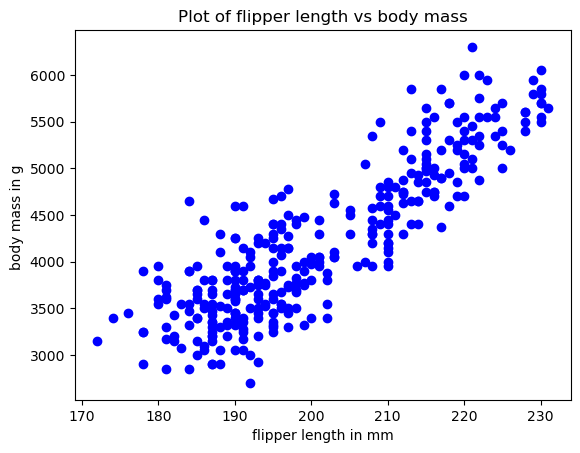

In [10]:
plt.scatter( penguins['flipper_length_mm'],penguins['body_mass_g'], color="blue")

# Add labels and title
plt.xlabel('flipper length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of flipper length vs body mass')

# Show the plot
plt.show()

How would you describe the relationship in the scatter plot we just made?

In [ ]:
CA_housing.info()

How many variables are in these data?  How do you know?



Next we'll look at some univariable (one variable) summaries.

Here is a graphical summary (histogram) of the variable _median income_

In [ ]:
plt.hist(CA_housing['median_income'], color="green")
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

What do you notice about the values for _median income_?  

In [ ]:
# Create the scatter plot
plt.scatter(CA_housing['median_income'], CA_housing['housing_median_age'], color="green")

# Add labels and title
plt.xlabel('log median income')
plt.ylabel('median house age')
plt.title('Scatterplot')

# Show the plot
plt.show()

Does there seem to be much of relationship there?



In [ ]:
plt.scatter( CA_housing['population'],CA_housing['total_rooms'], color="blue")

# Add labels and title
plt.xlabel('households')
plt.ylabel('total rooms')
plt.title('Scatterplot of households vs total rooms')

# Show the plot
plt.show()

In [ ]:
plt.scatter( CA_housing['total_rooms'],CA_housing['total_bedrooms'], color="blue", alpha=0.2)

# Add labels and title
plt.xlabel('total rooms')
plt.ylabel('total bedrooms')
plt.title('Scatterplot of total rooms vs total bedrooms')

# Show the plot
plt.show()

One of the things that is hard to do is see all the points when they have lots of overlap.  Fortunately, we have some control over the scatterplot in _matplotlib_.

In the code below in the _scatter_ command, I've added the option for _marker_ and _alpha_ to go with the _color_ option that was already there.  

_marker_ changes the plot character at each point.  In this case the default as we saw above is a circle, while the option _marker="*"_ changes the plot character to a star.  

_alpha_ changes the level of transparency of each point so you can see if there are other points below.  Values of _alpha_ range from  0 to 1 with smaller values being more transparency.  

In [ ]:
plt.scatter(CA_housing['total_rooms'], CA_housing['total_bedrooms'], color="blue", marker = "*", alpha=0.1)

# Add labels and title
plt.xlabel('population')
plt.ylabel('total_bedrooms')
plt.title('Scatterplot of population vs total bedrooms')

# Show the plot
plt.show()

How would you describe the plot above?

Remark on the shape, direction, strength, and possible outliers 

### Linear Regression

Linear regression is a modelling approach that assumes a linear shape to a relationship. 

We are going to _start_ with what is known as a simple linear regression and the word simple comes from the fact that there is just a single predictor/explanatory variable/feature.  A linear regression fits a line, sometimes called a line of best fit, to the $x$ and $y$ points in the data.  

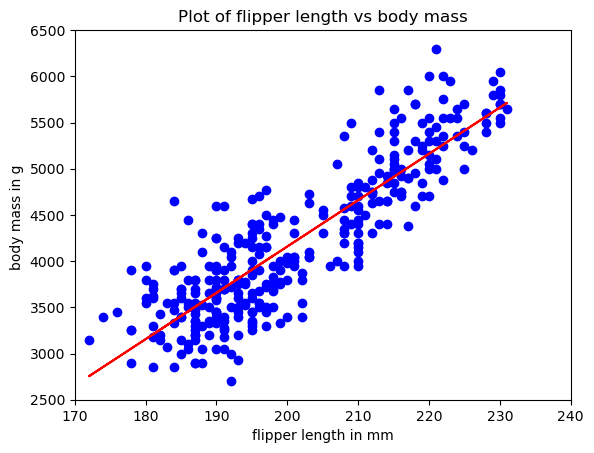

In [20]:
plt.scatter( penguins['flipper_length_mm'],penguins['body_mass_g'], color="blue")

# Add labels and title
plt.xlabel('flipper length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of flipper length vs body mass')

# Add regression line to plot
plt.plot(x, 50.1533*x + -5872.0927 , color='red')

# Set the x-axis and the y-axis limits
plt.xlim(170, 240)
plt.ylim(2500,6500)
# Show plot
plt.show()

In [12]:
import statsmodels.api as sm

#define response variable
y = penguins['body_mass_g']

#define predictor variables
x = penguins[['flipper_length_mm']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 10 Jan 2025   Prob (F-statistic):          3.13e-105
Time:                        16:01:09   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

In [13]:
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

AttributeError: 'PandasData' object has no attribute 'design_info'

Tasks:

1.  For the California Housing data (CA_housing.csv), plot and describe the relationship between  